<a href="https://colab.research.google.com/github/giramakshay/play_store_eda/blob/main/Play_Store_Data_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - EDA on Play Store Data
##### **Contribution**    - Individual
##### **Name -**          - Akshay Giram

# **Project Summary -**

In this project we will perform Exploratory Data Analysis on Play Store Data. Play Store dataset contains information like reviews, ratings, size, category, etc. on around 10,000 apps. In this project we will do some data cleaning and wrangling to clean and ready the data for exploratory analysis. Then, we will chart various variable to find any relationships between them, and identify top performing categories.

# **GitHub Link -**

https://github.com/giramakshay/play_store_eda

# **Problem Statement**


Perform exploratory data analysis to identify relationships in variable and identify top performing categories, and identify common attributes (or relationships) between the top rated apps and those between the most installed apps.

#### **Define Your Business Objective?**

- Identify top categories for new app development. These categories should be 
based on reviews, ratings, and number of installs.
- Relationship between attributes of top rated apps
- Relationship between attributes of most installed apps

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [402]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import missingno as msno

import time

### Dataset Loading

In [403]:
path = "https://raw.githubusercontent.com\
/giramakshay/play_store_eda/main\
/Play%20Store%20Data.csv"
app_data = pd.read_csv(path)

### Dataset First View

In [404]:
# Dataset First Look
app_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Dataset Rows & Columns count

In [405]:
# Dataset Rows & Columns count
app_data.shape

(10841, 13)

### Dataset Information

In [406]:
# Dataset Info
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [407]:
# we won't be using the last two columns in our analysis
app_data.drop(columns=["Current Ver", "Android Ver"], inplace=True)

#### Duplicate Values

In [408]:
# Dataset Duplicate Value Count
app_data[app_data.duplicated()].head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018"
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018"
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018"


In [409]:
app_data[app_data.duplicated()].shape

(483, 11)

In [410]:
app_data.query('App == "Box"')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
204,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018"
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018"
265,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018"


The dataset contains 483 apps that have duplicate records. We will remove these duplicate records and keep only the first occurance.

In [411]:
# setting ignore_index=True in order to reset the index
# performing the operation inplace
app_data.drop_duplicates(ignore_index=True, inplace=True)

In [412]:
app_data[app_data.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated


In [413]:
app_data.shape

(10358, 11)

In [414]:
# checking unique values in App column
app_data['App'].nunique()

9660

In [415]:
# tha App column has 9660 unique values, we'll check for duplicated within App column
app_data[app_data.duplicated(["App"])].shape

(698, 11)

In [416]:
app_data[app_data.duplicated(["App"])]['App'].value_counts()

ROBLOX                            8
8 Ball Pool                       6
Bubble Shooter                    5
Zombie Catchers                   5
Helix Jump                        5
                                 ..
Google Docs                       1
Microsoft Excel                   1
Smart Launcher 5                  1
Calculator                        1
Slickdeals: Coupons & Shopping    1
Name: App, Length: 523, dtype: int64

In [417]:
# 523 apps are listed more than once
app_data[app_data.duplicated(["App"], keep=False )].query("App == 'ROBLOX'")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
1446,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018"
1494,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018"
1538,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018"
1625,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018"
1653,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018"
1786,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018"
1857,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018"
1956,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018"
4072,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018"


In [418]:
# we want to keep one record from each category with highest reviews, and checking for ROBLOX
app_data.sort_values(["App", "Reviews"]).drop_duplicates(["App","Category"], keep='last').query("App == 'ROBLOX'")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
1653,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018"
1956,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018"


In [419]:
app_data = app_data.sort_values(["App", "Reviews"]).drop_duplicates(["App","Category"], keep='last').sort_index()

In [420]:
app_data.shape

(9745, 11)

In [421]:
# checking unique values in App column
app_data['App'].nunique()

9660

In [422]:
# We can see that unique values in App column are 9660 and rows in dataframe are 9745
# this is because the difference, i.e, 85 values are listed in more than one category.
# which can be confirmed by grouping by App and Category

app_data.groupby(["App", "Category"]).nunique()

,,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
App,Category,,,,,,,,,
"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,0,1,1,1,1,1,1,1,1
+Download 4 Instagram Twitter,SOCIAL,1,1,1,1,1,1,1,1,1
- Free Comics - Comic Apps,COMICS,1,1,1,1,1,1,1,1,1
.R,TOOLS,1,1,1,1,1,1,1,1,1
/u/app,COMMUNICATION,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
"뽕티비 - 개인방송, 인터넷방송, BJ방송",VIDEO_PLAYERS,0,1,1,1,1,1,1,1,1
💎 I'm rich,LIFESTYLE,1,1,1,1,1,1,1,1,1
"💘 WhatsLov: Smileys of love, stickers and GIF",SOCIAL,1,1,1,1,1,1,1,1,1


In [423]:
# verifying that no duplicates exist
app_data[app_data.duplicated(["App", "Category"])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated


#### Missing Values/Null Values

In [424]:
# Missing Values/Null Values Count
app_data.isna().sum()

App                  0
Category             0
Rating            1464
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
dtype: int64

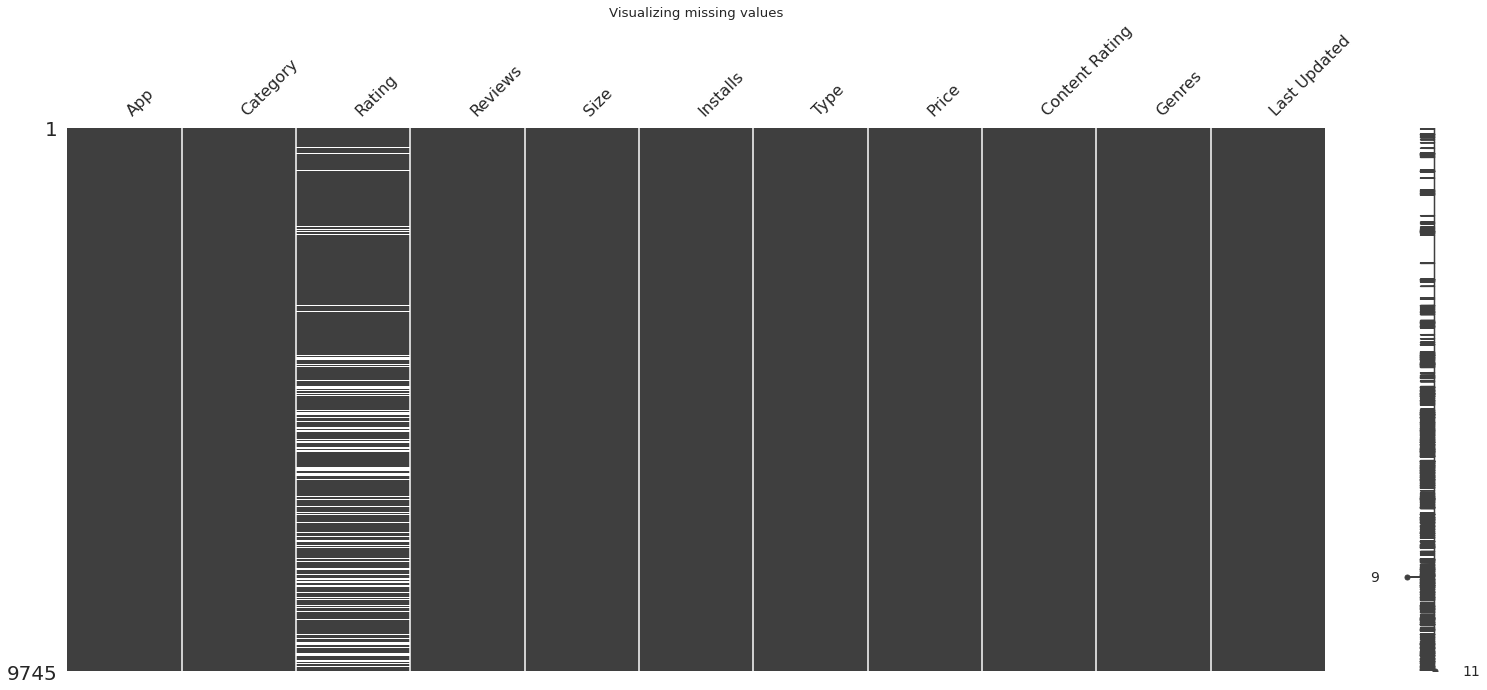

In [425]:
# Visualizing the missing values with missingno library
msno.matrix(app_data)
plt.title("Visualizing missing values")
plt.show()

1465 values for rating are missing. A few values for current version, android version and content rating are also missing. We will keep the records with missing values and we will ignore the missing values as we perform our charting and calculations below. For this particular EDA we will not use any particular imputation method.

### What did you know about your dataset?

We are presented with a dataset of apps on play store. There are 10841 total records in the dataset which have 13 fields each. Out of these, 483 are duplicate records, which we remove for our EDA.

The ratings field has 1465 missing values. We process these (or ignore these) when performing analysis relating to ratings of the apps.

We will calculate the performace of apps by their rating, reviews and number of installs.

We will perform EDA on this dataset to find out following insights:
- Top performing categories
- Most popular apps by installs
- Most popular apps by rating
- Top categories for paid apps
- Top categories for free apps
- Ratings of highly priced apps
- And more

## ***2. Understanding Your Variables***

In [426]:
# Dataset Columns
app_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated'],
      dtype='object')

In [427]:
# Dataset Describe
app_data.describe()

,Rating
count,8281.000000
mean,4.176790
std,0.558933
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


### Variables Description 

We can see that max for rating is 19 which is erronous. We will remove record containing this data.

### Check Unique Values for each variable.

In [428]:
app_data.shape

(9745, 11)

In [429]:
# Check Unique Values for each variable.
for col in app_data.columns:
    print(f"{col}: {app_data[col].nunique()}")

App: 9660
Category: 34
Rating: 40
Reviews: 5406
Size: 462
Installs: 22
Type: 3
Price: 93
Content Rating: 6
Genres: 120
Last Updated: 1378


## 3. ***Data Wrangling***

### Data Wrangling Code

In [430]:
# we have seen above in describe() that max for rating is 19
# checking for erronous data where rating is more than 5
app_data[app_data["Rating"]>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
9990,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19


We can see that in this record the category values is absent and all other values are offset to left. We can fix this or remove this record. We will fix this record.

In [431]:
# finding correct category for such apps
app_data[app_data['App'].str.contains("frame")].head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
2469,Photo frame,PHOTOGRAPHY,4.5,859,21M,"100,000+",Free,0,Everyone,Photography,"July 18, 2018"
9362,"Photo Lab Picture Editor: face effects, art fr...",PHOTOGRAPHY,4.5,1536512,Varies with device,"50,000,000+",Free,0,Everyone,Photography,"July 17, 2018"


In [432]:
# assign the correct values
app_data.loc[9990, 'Rating':'Last Updated'] = app_data.loc[9990, 'Category':'Genres'].values

In [433]:
# update category to be PHOTOGRAPHY
app_data.loc[9990, "Category"] = 'PHOTOGRAPHY'

In [434]:
app_data.query("App == 'Life Made WI-Fi Touchscreen Photo Frame'")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
9990,Life Made WI-Fi Touchscreen Photo Frame,PHOTOGRAPHY,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018"


In [435]:
# checking dtypes
app_data.dtypes

App               object
Category          object
Rating            object
Reviews           object
Size              object
Installs          object
Type              object
Price             object
Content Rating    object
Genres            object
Last Updated      object
dtype: object

In [436]:
# trying to convert dtypes
app_data = app_data.convert_dtypes()
app_data.dtypes

App               string
Category          string
Rating            object
Reviews           object
Size              string
Installs          string
Type              string
Price             string
Content Rating    string
Genres            string
Last Updated      string
dtype: object

Before we convert datatypes of rating, reviews, size, instals, price to numeric, we will process the string values first.

In [437]:
# some sample data with non-free apps
app_data.query("Type == 'Paid'").sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
8243,DRAGON QUEST II,FAMILY,4.5,2576,44M,"10,000+",Paid,$4.99,Everyone,Role Playing,"March 9, 2018"
1940,Lanterns: The Harvest Festival,FAMILY,4.7,185,72M,"1,000+",Paid,$4.99,Everyone,Board;Brain Games,"May 1, 2018"
9198,O Céu e o Inferno,BOOKS_AND_REFERENCE,NaN,14,754k,500+,Paid,$0.99,Everyone,Books & Reference,"October 7, 2013"
7547,30WPM Amateur ham radio Koch CW Morse code tra...,FAMILY,5.0,1,3.7M,10+,Paid,$1.49,Everyone,Education,"May 18, 2018"
6420,My Budget Book,FINANCE,4.7,19784,7.3M,"100,000+",Paid,$2.99,Everyone,Finance,"June 13, 2018"


In [438]:
# converting dtype of 'Rating' column
app_data['Rating'] = app_data['Rating'].astype(float)
app_data['Rating'].dtypes

dtype('float64')

In [439]:
# converting dtype of 'Reviews' column
app_data['Reviews'] = app_data['Reviews'].astype(float)
app_data['Reviews'].dtypes

dtype('float64')

In [440]:
# processing values in size column
app_data['Size'].value_counts()

Varies with device    1250
11M                    183
12M                    181
13M                    179
14M                    178
                      ... 
879k                     1
161k                     1
994k                     1
309k                     1
619k                     1
Name: Size, Length: 461, dtype: Int64

In [441]:
# We will set the value of "Varies with device" as 0
# We will use sizes in MB only, so 500k will be processed to 500/1024 =  0.48
app_data['Size'] = app_data['Size'].apply(lambda x: 0 if x=="Varies with device" \
                                          else float(x.strip("M")) if x.endswith("M") \
                                          else round(float(x.strip("k"))/1024, 2) if x.endswith("k") \
                                          else x)\
                                          .astype(float)
app_data['Size'].value_counts()

0.00     1250
11.00     183
12.00     181
13.00     179
14.00     178
         ... 
0.48        1
0.10        1
0.56        1
0.75        1
0.66        1
Name: Size, Length: 274, dtype: int64

In [442]:
# processing values in "Installs" column
# replace "," with "" (nothing) and remove "+" at the end
app_data['Installs'] = app_data['Installs'].str.strip("+")\
                                        .str.replace(",","")\
                                        .fillna(0)\
                                        .astype(int)

app_data['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10353        5000
10354         100
10355        1000
10356        1000
10357    10000000
Name: Installs, Length: 9745, dtype: int64

In [443]:
# converting dtype of 'Price' column
app_data['Price'].value_counts()

0          8987
$0.99       145
$2.99       124
$1.99        73
$4.99        70
           ... 
$200.00       1
$394.99       1
$3.61         1
$30.99        1
$1.04         1
Name: Price, Length: 92, dtype: Int64

In [444]:
app_data['Price'] = app_data['Price'].str.strip("$").astype(float)
app_data['Price'].value_counts()

0.00      8987
0.99       145
2.99       124
1.99        73
4.99        70
          ... 
18.99        1
389.99       1
19.90        1
1.75         1
1.04         1
Name: Price, Length: 92, dtype: int64

In [445]:
# converting "Last Update" column to datetime type
app_data['Last Updated'].head(3)

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
Name: Last Updated, dtype: string

In [446]:
app_data['Last Updated'] = pd.to_datetime(app_data['Last Updated'])
app_data['Last Updated'].head(3)

0   2018-01-07
1   2018-01-15
2   2018-08-01
Name: Last Updated, dtype: datetime64[ns]

In [447]:
# confirming all dtypes
app_data.dtypes

App                       string
Category                  string
Rating                   float64
Reviews                  float64
Size                     float64
Installs                   int64
Type                      string
Price                    float64
Content Rating            string
Genres                    string
Last Updated      datetime64[ns]
dtype: object

**Adding a custom performance metric**

In [448]:
# we will add a custom performance metric for out data
# We will use this metric to plot chart below

app_data['performance'] = ((app_data['Rating'] * app_data['Reviews']) / app_data['Installs']).fillna(0).astype(float)

Now, we will see summary statistics before moving on

In [449]:
app_data.describe().round(2)

,Rating,Reviews,Size,Installs,Price,performance
count,8281.00,9745.00,9745.00,9.745000e+03,9745.00,9745.00
mean,4.17,238091.12,17.89,8.206633e+06,1.09,0.14
std,0.54,1934379.90,21.61,5.527784e+07,16.78,0.38
min,1.00,0.00,0.00,0.000000e+00,0.00,0.00
25%,4.00,26.00,2.90,1.000000e+03,0.00,0.02
50%,4.30,1015.00,9.20,1.000000e+05,0.00,0.06
75%,4.50,30693.00,25.00,1.000000e+06,0.00,0.14
max,5.00,78158306.00,100.00,1.000000e+09,400.00,20.00


### What all manipulations have you done and insights you found?

The dataset had a erronous record, we fixed the record to contain the right values in right column.
We processed the values stored as strings to appropriate numeric types.

From the app_data.describe() We find that this dataset contains mostly free apps (75% = 0). And of the few that are paid, the priciest one costs $400 (max = 400).
App sizes vary from a few kBs to 100MB.
We will get into more details below.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

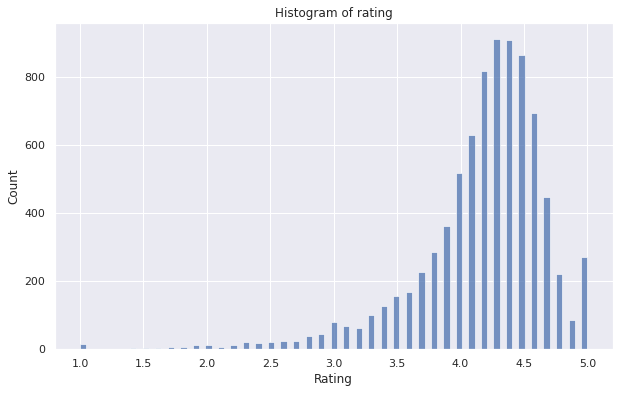

In [450]:
# Chart - 1: Histogram of ratings
sns.set(rc={'figure.figsize':(10,6)})
sns.histplot(app_data, x='Rating').set(title="Histogram of rating")
plt.show()

##### 1. Why did you pick the specific chart?

Histogram is an easy way to visualize where most of the datapoints lie on a given scale.

##### 2. What is/are the insight(s) found from the chart?

- Most apps have a rating of around 4 to 4.5
- Very few apps have a lower rating of less than 3
- There are around 300 apps that have a full 5 rating.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There is a lot of room at the top, i.e, for 5 rated app.

#### Chart - 2

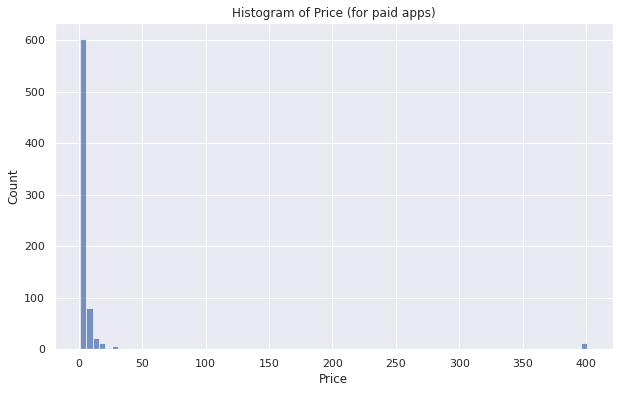

In [451]:
# Chart - 2: Histogram of Price
sns.set(rc={'figure.figsize':(10,6)})
sns.histplot(app_data.query("Type == 'Paid'"), x='Price', binwidth=5).set(title="Histogram of Price (for paid apps)")
plt.show()

##### 1. Why did you pick the specific chart?

We can easily identify what is the price point of most apps on an histogram.

##### 2. What is/are the insight(s) found from the chart?

We can see that most paid apps cost very little, as less as less than 5 dollar. Although, there are apps that cost more, there are only around 10 apps that cost $400.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

At this point, we are certain that there are not many apps that cost very high. But, we still have to verify if the highly priced apps are really a success or not.

#### Chart - 3

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


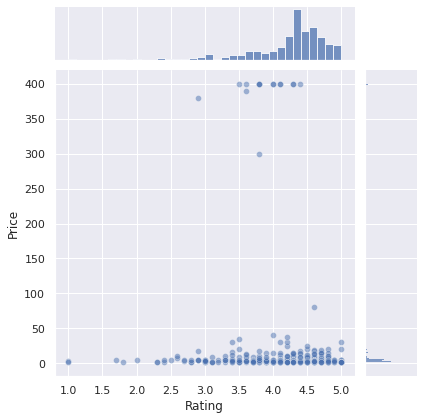

In [452]:
# Chart - 3 Price vs Rating
# sns.set(rc={'figure.figsize':(10,10)})
# sns.FacetGrid(data=app_data.query("Type=='Paid'")).map(sns.jointplot, 'Rating', 'Price', alpha=0.5)
sns.jointplot('Rating', 'Price', data=app_data.query("Type=='Paid'"), alpha=0.5)
# fig.tight_layout()
# plt.title("Jointplot of Price vs Rating")
plt.show()

##### 1. Why did you pick the specific chart?

We can explore relationship between price and rating using a joint plot, which shows us a scatter plot displaying where data lies, and along with that we can see the distributions of both variables as histograms.

##### 2. What is/are the insight(s) found from the chart?

We can see that there is no apparent relation between price and rating. There are apps both costly and cheap that are highly rated. But, from the distribution we can see that there are a lot more lower priced apps in the dataset.

#### Chart - 4

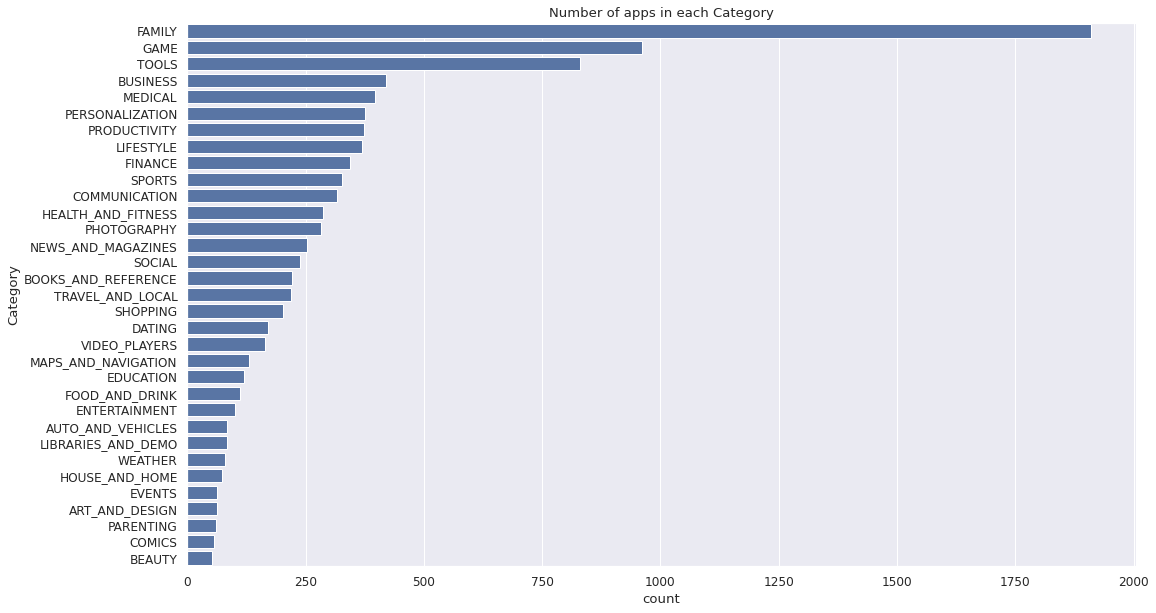

In [453]:
# Chart - 4: Categories
sns.set_theme(rc={'figure.figsize':(17,10)}, font_scale=1.1)
sns.countplot(data=app_data, y='Category',
              order=app_data['Category'].value_counts().index,
              color='b')\
              .set(title="Number of apps in each Category")
plt.show()

##### 1. Why did you pick the specific chart?

Countplot is the easiest way to visualize the count of apps in each category.

##### 2. What is/are the insight(s) found from the chart?

Most apps are listed under this top 5 categories, in order.
1. Family
2. Game
3. Tools
4. Business
5. Medical

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We can understand from the insight above that these top 5 categories are where most demanded apps lie. If we are to build new apps, we should focus on building good quality apps in these top 5 categories, as they are in most demand. Also, we should note that these categories are also where top competition lies.

#### Chart - 5

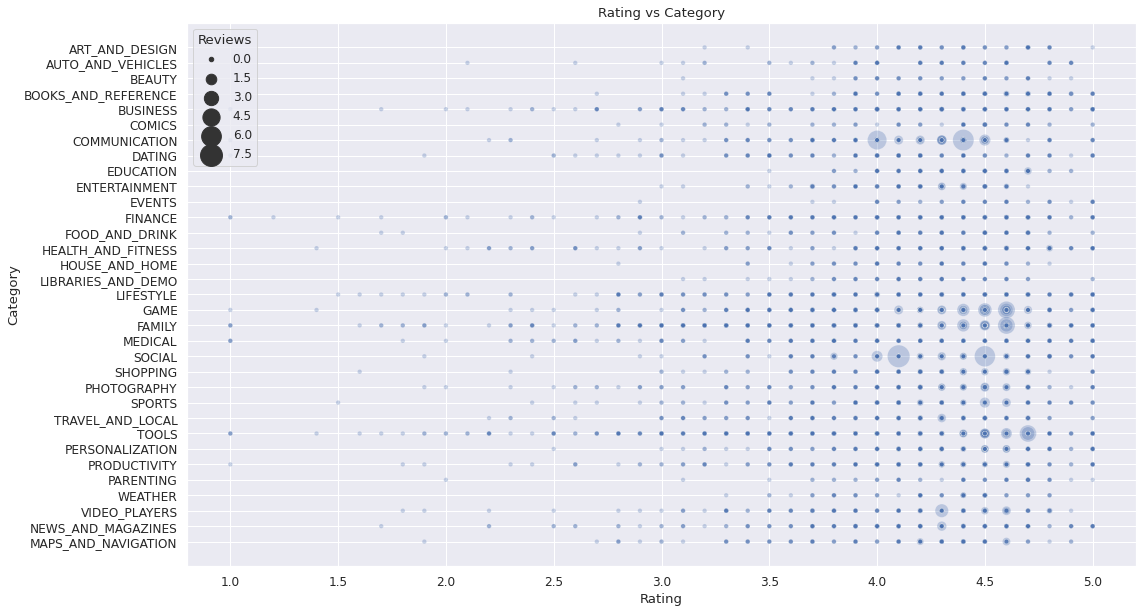

In [454]:
# Chart - 5: Category, Rating, Reviews

sns.scatterplot(data=app_data, x='Rating', y='Category', alpha=0.3, size='Reviews', sizes=(20,500))
plt.title("Rating vs Category")
plt.show()

##### 1. Why did you pick the specific chart?

A scatterplot with sizes (a bubble plot) is a quick way of visualizing relationship of Rating and Category along with impact of Reviews.

##### 2. What is/are the insight(s) found from the chart?

There are apps that are fairly good rated (4 to 5) with large number of reviews in the following categories:
- Communication
- Game
- Family
- Social
- Tools
- Video Players

Among these, the most reviewed apps appear to lie in Social category.    

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Some apps in social category appears to be highly rated and highly reviewed as compared to apps in other category. People appreciate apps that enhance the social aspect of their lives. If we are building an app, we should consider this aspect.

#### Chart - 6

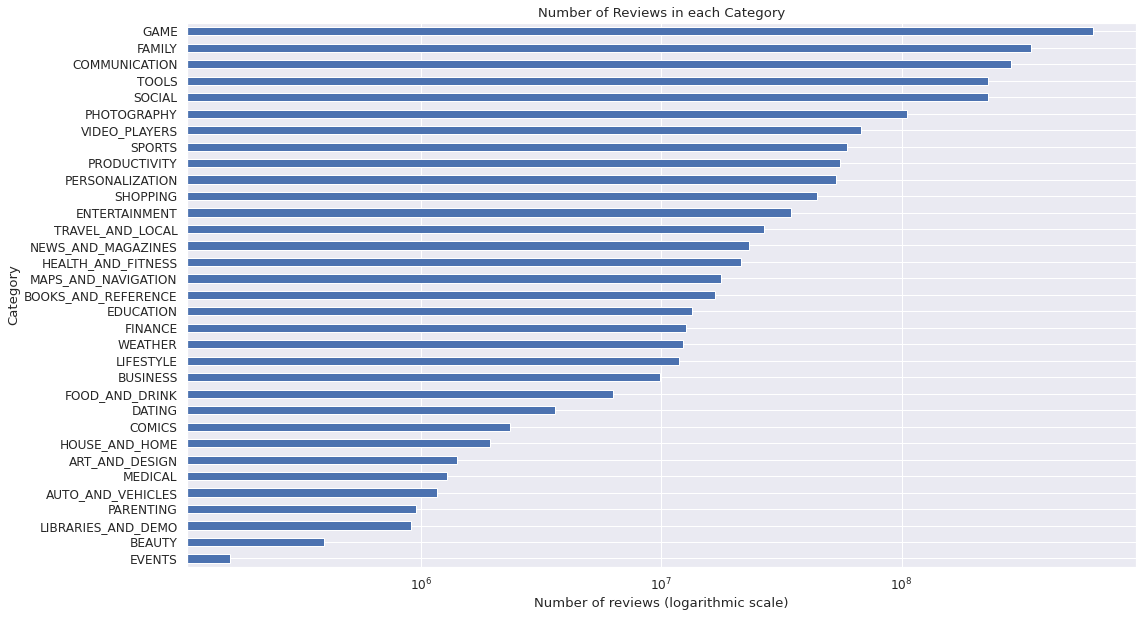

In [455]:
# Chart 6: Number of Reviews in each Category

app_data.groupby('Category')['Reviews'].sum().sort_values().plot(kind='barh')
plt.xscale('log')
plt.xlabel("Number of reviews (logarithmic scale)")
plt.title("Number of Reviews in each Category")
plt.show()

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This plot confirms the findings from previous plot. Top 5 Categories by number of reviews published are: 
1. Game
2. Communication
3. Social
4. Family
5. Tools

We will see further top categories by most installed apps.

#### Chart - 7

In [456]:
# app_data.groupby('Category')['Installs'].sum().sort_values()

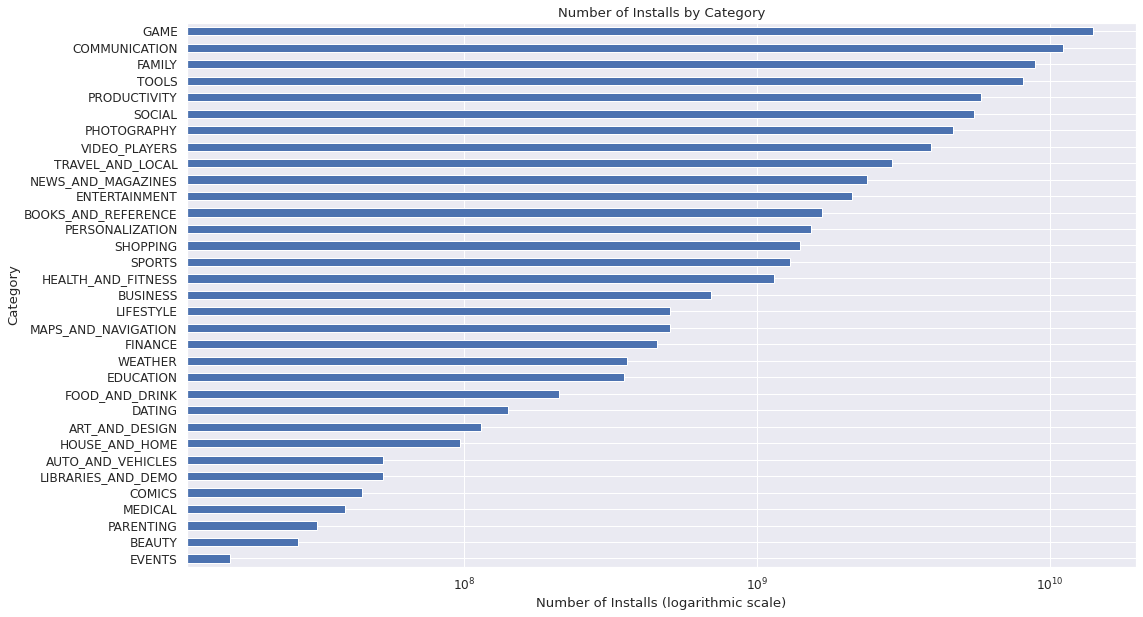

In [457]:
# Chart - 7: Top Categories by most Installs 

app_data.groupby('Category')['Installs'].sum().sort_values().plot(kind='barh')
plt.xscale('log')
plt.xlabel("Number of Installs (logarithmic scale)")
plt.title("Number of Installs by Category")
plt.show()

##### 2. What is/are the insight(s) found from the chart?

Top Categories by number of app Installs are:
1. Game
2. Communication
3. Social
4. Productivity
5. Tools


We can see that Game, Communication, Social, Tools are the Categories having most number of Installs and the most number of Reviews. These Categories are "hot" and could prove to be profitable.

#### Chart - 8

In [458]:
" ".join(app_data['Genres'].dropna().str.replace(" & ","And").str.replace(";", " ").tolist())

'ArtAndDesign ArtAndDesign Pretend Play ArtAndDesign ArtAndDesign ArtAndDesign Creativity ArtAndDesign ArtAndDesign ArtAndDesign ArtAndDesign ArtAndDesign Creativity ArtAndDesign ArtAndDesign ArtAndDesign ArtAndDesign ArtAndDesign ArtAndDesign ArtAndDesign ArtAndDesign ArtAndDesign ArtAndDesign ArtAndDesign ArtAndDesign ArtAndDesign ArtAndDesign ActionAndAdventure ArtAndDesign ArtAndDesign ArtAndDesign Creativity ArtAndDesign ArtAndDesign ArtAndDesign ArtAndDesign ArtAndDesign ArtAndDesign ArtAndDesign ArtAndDesign ArtAndDesign ArtAndDesign Creativity ArtAndDesign ArtAndDesign ArtAndDesign ArtAndDesign ArtAndDesign ArtAndDesign Creativity ArtAndDesign ArtAndDesign ArtAndDesign ArtAndDesign ArtAndDesign AutoAndVehicles AutoAndVehicles AutoAndVehicles AutoAndVehicles AutoAndVehicles AutoAndVehicles AutoAndVehicles AutoAndVehicles AutoAndVehicles AutoAndVehicles AutoAndVehicles AutoAndVehicles AutoAndVehicles AutoAndVehicles AutoAndVehicles AutoAndVehicles AutoAndVehicles AutoAndVehicles 

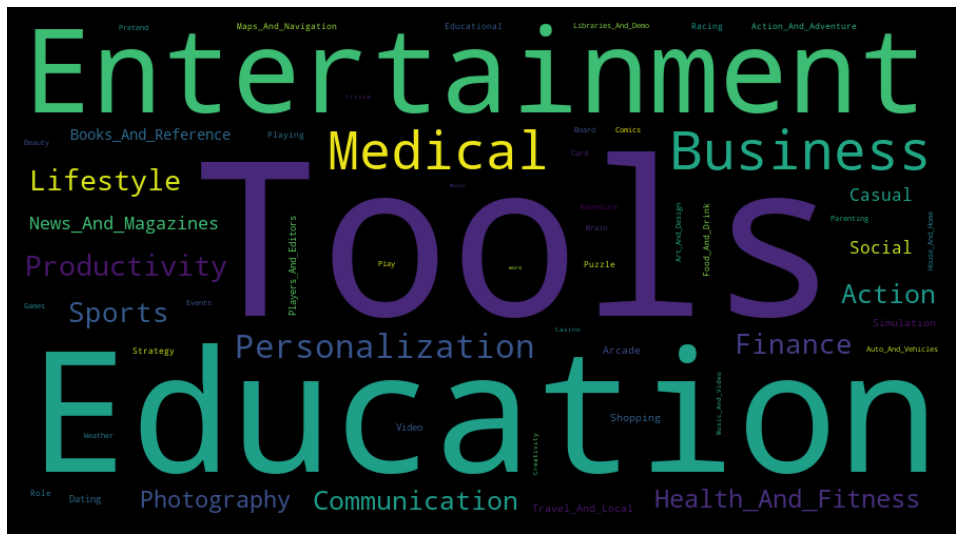

In [459]:
# Chart - 8: Frequent Genres
# Let's create a wordcloud
from wordcloud import WordCloud

# joining all genres names by space, and replacing " & " by "_And_" as the wordcloud will separate by space and/or natural language
genres_string = " ".join(app_data['Genres'].dropna().str.replace(" & ","_And_").str.replace(";", " ").tolist())

wordcloud = WordCloud(width=900, height=500, margin=30, collocations=False).generate(genres_string)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [460]:
app_data['Genres'].value_counts().head(10)

Tools              828
Entertainment      579
Education          519
Business           420
Medical            396
Personalization    376
Productivity       374
Lifestyle          368
Finance            345
Sports             333
Name: Genres, dtype: Int64

##### 1. Why did you pick the specific chart?

Wordcloud is a popular way of visualizing most occuring words in a string. We convert all the values in Genres column to a string, and generate a wordcloud.

##### 2. What is/are the insight(s) found from the chart?

We can see that 5 most frequently occuring Genres in dataset are:
1. Tools
2. Entertainment
3. Education
4. Business
5. Medical
6. Productivity
7. Personalization
8. Lifestyle
9. Communication
10. Sports

#### Chart - 9

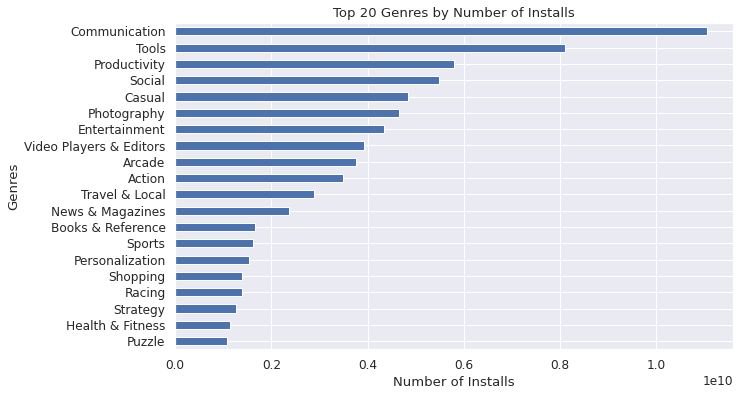

In [461]:
# Chart - 9 Top Genres by Installs
plt.figure(figsize=(10,6))
app_data.groupby("Genres")["Installs"].sum().sort_values().tail(20).plot(kind='barh')
plt.title("Top 20 Genres by Number of Installs")
plt.ylabel("Genres")
plt.xlabel("Number of Installs")
plt.show()

##### 2. What is/are the insight(s) found from the chart?

Communication is the top performing genre with almost 24 million total installs.

Top 5 Genres by Installs are:
1. Communication
2. Social
3. Productivity
4. Tools
5. Photography

These genres are most installed. It is interesting to find that some of these are also have most listed apps under them.

#### Chart - 10

In [462]:
# ((pd.to_datetime("9-1-2018") - app_data['Last Updated'])).dt.days

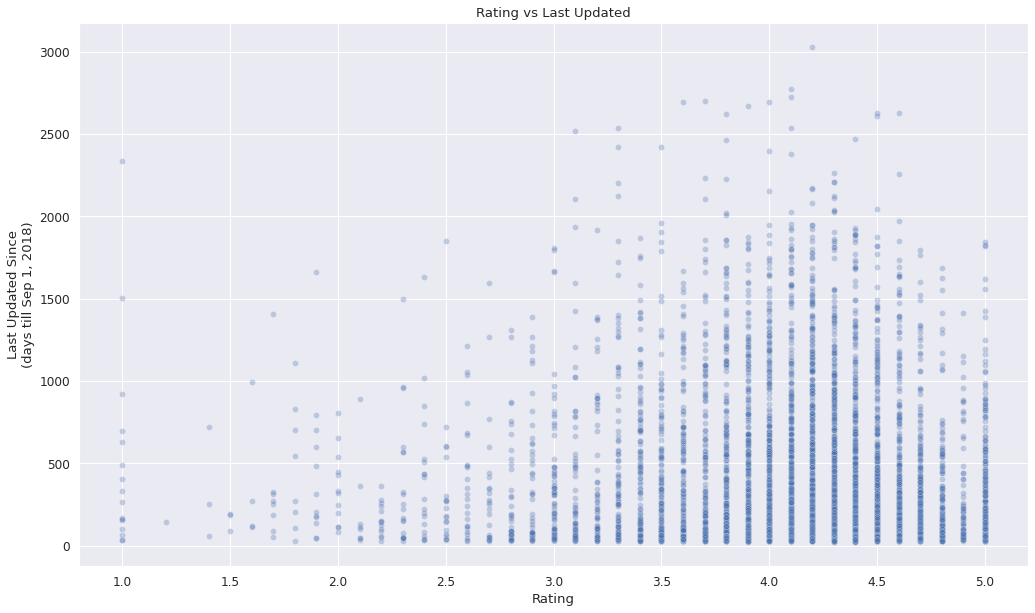

In [463]:
# Chart - 10: Rating vs Last Updated (as on Sep 1, 2018)
# 0 = updated on Sep 1, 2018, 30 = updated 30 days ago.

sns.scatterplot(data = app_data, x='Rating', 
                y = ((pd.to_datetime("9-1-2018") - app_data['Last Updated'])).dt.days, alpha=0.3)\
                .set(title='Rating vs Last Updated', ylabel="Last Updated Since\n(days till Sep 1, 2018)")
plt.show()

##### 1. Why did you pick the specific chart?

We can see the relationship between the "updated since days" and Rating in this chart.

##### 2. What is/are the insight(s) found from the chart?

No apparent relation can be found. But, we can observe that most apps that are updated within the last 500 days are rated between 3 and 5. However, we can't say a relation exists. 

#### Chart - 11

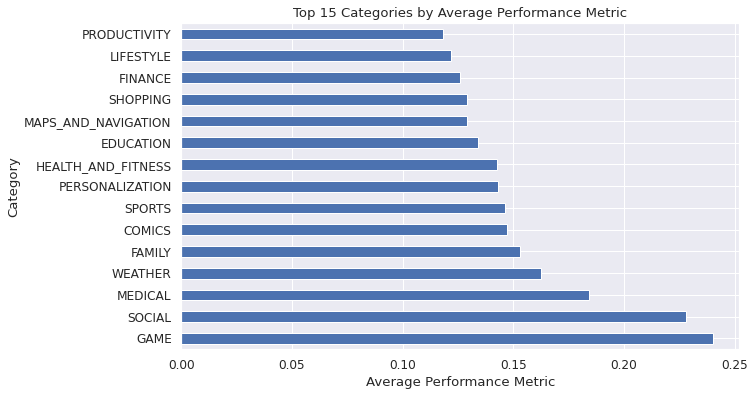

In [464]:
# Chart - 11: Top Performing Categories by average performance metric

# app_data.sort_values("performance", ascending=False).query("Installs > 10000").head(10)
plt.figure(figsize=(10,6))
app_data.groupby("Category").agg('mean')['performance'].sort_values(ascending=False).head(15).plot(kind='barh')
plt.title("Top 15 Categories by Average Performance Metric")
plt.xlabel("Average Performance Metric")
plt.show()

##### 1. Why did you pick the specific chart?

We calculate the performance metric as `(Rating * Reviews / Installs)` and we plot the top 15 categories by this performance metric.

##### 2. What is/are the insight(s) found from the chart?

The top 5 Categories by performance metric are:
1. Game
2. Social
3. Medical
4. Weather
5. Family

#### Chart - 12 - Heatmap (performance of categories)

In [465]:
app_data['Category'].value_counts().count()

33

In [466]:
# In order to visualize the average performance by category, we will create a dataframe df
# with the original dataframe grouped by category, and average value of performance by category

df = pd.DataFrame(app_data.groupby('Category').agg('mean')['performance'])
df.sort_values(by="performance", inplace=True)
df = df.reset_index()

# Since there are 33 categories we will create a 11x3 matrix

# storing values to create labels for heatmap
performance = np.asarray(df['performance'].round(3)).reshape(11,3)
categories = np.asarray(df['Category']).reshape(11,3)
labels = np.asarray([f"{cat}\n{perf}" for cat, perf in zip(categories.flatten(), performance.flatten())]).reshape(11,3)

In [467]:
# adding new columns to pivot by rows and columns (11,3)
x, y = np.meshgrid(np.arange(1,4), np.arange(1,12))

df = df.assign(xcols = x.flatten())
df = df.assign(yrows = y.flatten())
df.head(6)

,Category,performance,xcols,yrows
0,LIBRARIES_AND_DEMO,0.048200,1,1
1,BEAUTY,0.059897,2,1
2,HOUSE_AND_HOME,0.062314,3,1
3,TRAVEL_AND_LOCAL,0.075712,1,2
4,PARENTING,0.082521,2,2
5,ART_AND_DESIGN,0.087111,3,2


In [468]:
dfp = df.pivot_table(index=['yrows'], columns='xcols', values='performance')
dfp

xcols,1,2,3
yrows,,,
1,0.048200,0.059897,0.062314
2,0.075712,0.082521,0.087111
3,0.094018,0.097845,0.101682
4,0.105208,0.106912,0.107438
5,0.107596,0.109805,0.112101
6,0.115165,0.117744,0.118102
7,0.118283,0.121825,0.126007
8,0.128978,0.129040,0.134030
9,0.142756,0.143246,0.146130


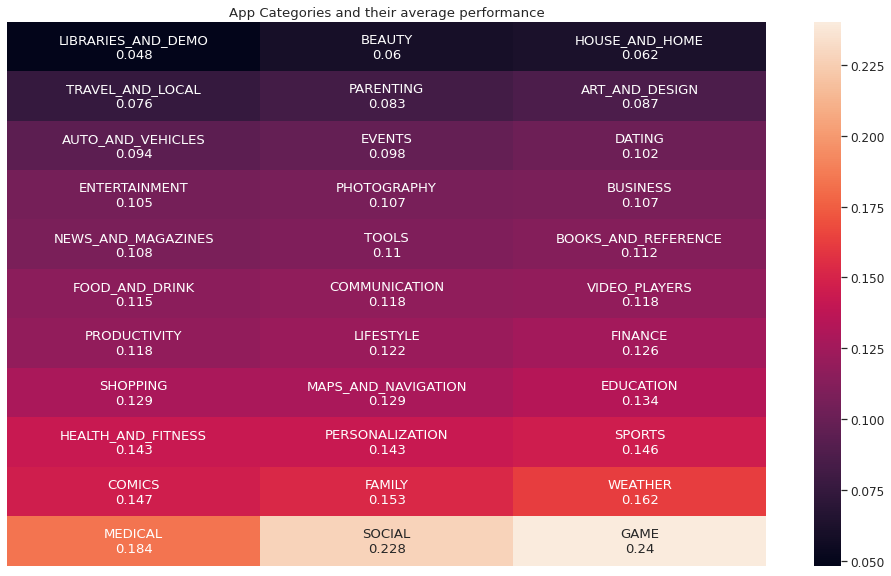

In [469]:
sns.heatmap(dfp, annot=labels, fmt='')
plt.axis('off')
plt.title("App Categories and their average performance")
plt.show()

We can visualize performance metric of each category here.

#### Chart - 13 - Correlation Heatmap

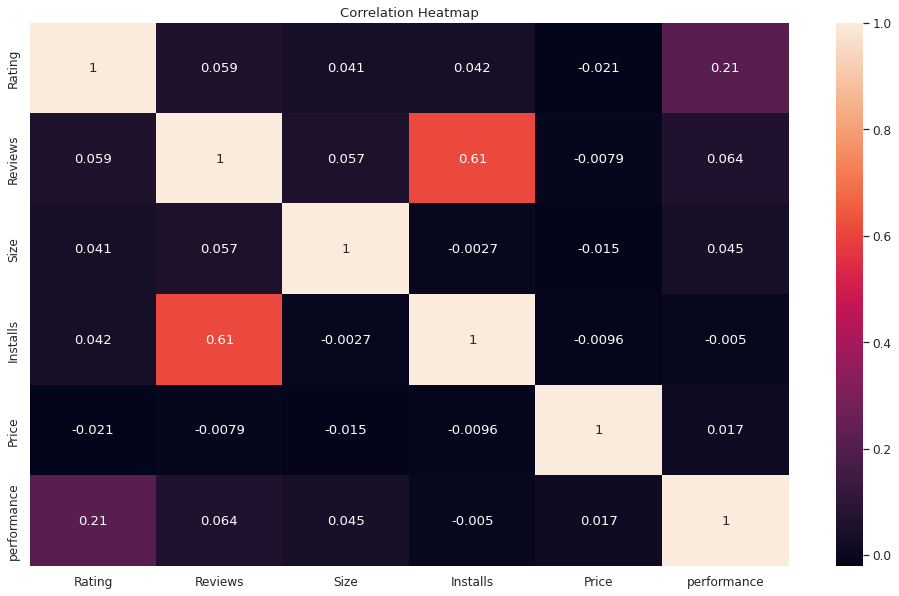

In [470]:
sns.heatmap(app_data.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

We can see that number of installs and number of reviews are highly correlated among other features.

#### Chart - 14 - Pair Plot 

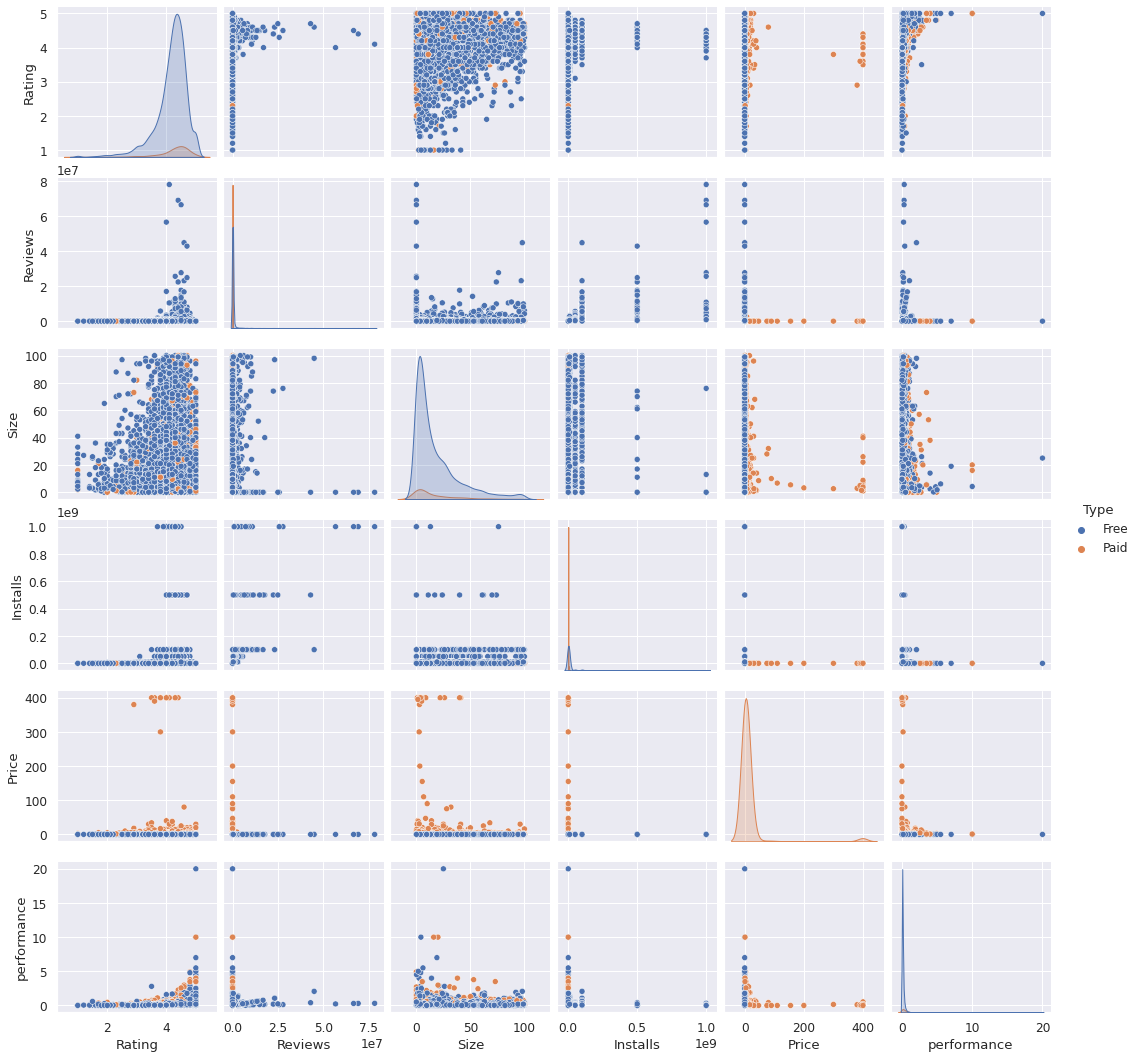

In [471]:
# Pair Plot visualization code
# Chart: Pair Plots

sns.pairplot(app_data, hue='Type')

plt.show()

##### 1. Why did you pick the specific chart?

By using pairplots we get a preliminary overview of the distribution of the data, and also how each numeric variable is related to other, in a single plot.

##### 2. What is/are the insight(s) found from the chart?

From this pair plot we are able to observe:
- Most apps in the dataset are free apps
- Most apps are rated around 4 (which is the mean and the median)
- Apps which have higher number of reviews are mostly rated more than 4.
- Installs column appears to be categorical. This is because all installs between, say 1000 and 2000 are recorded as 1000+ (which we reduced to 1000).


#### Chart - 15 - Pairplot of highly rated apps

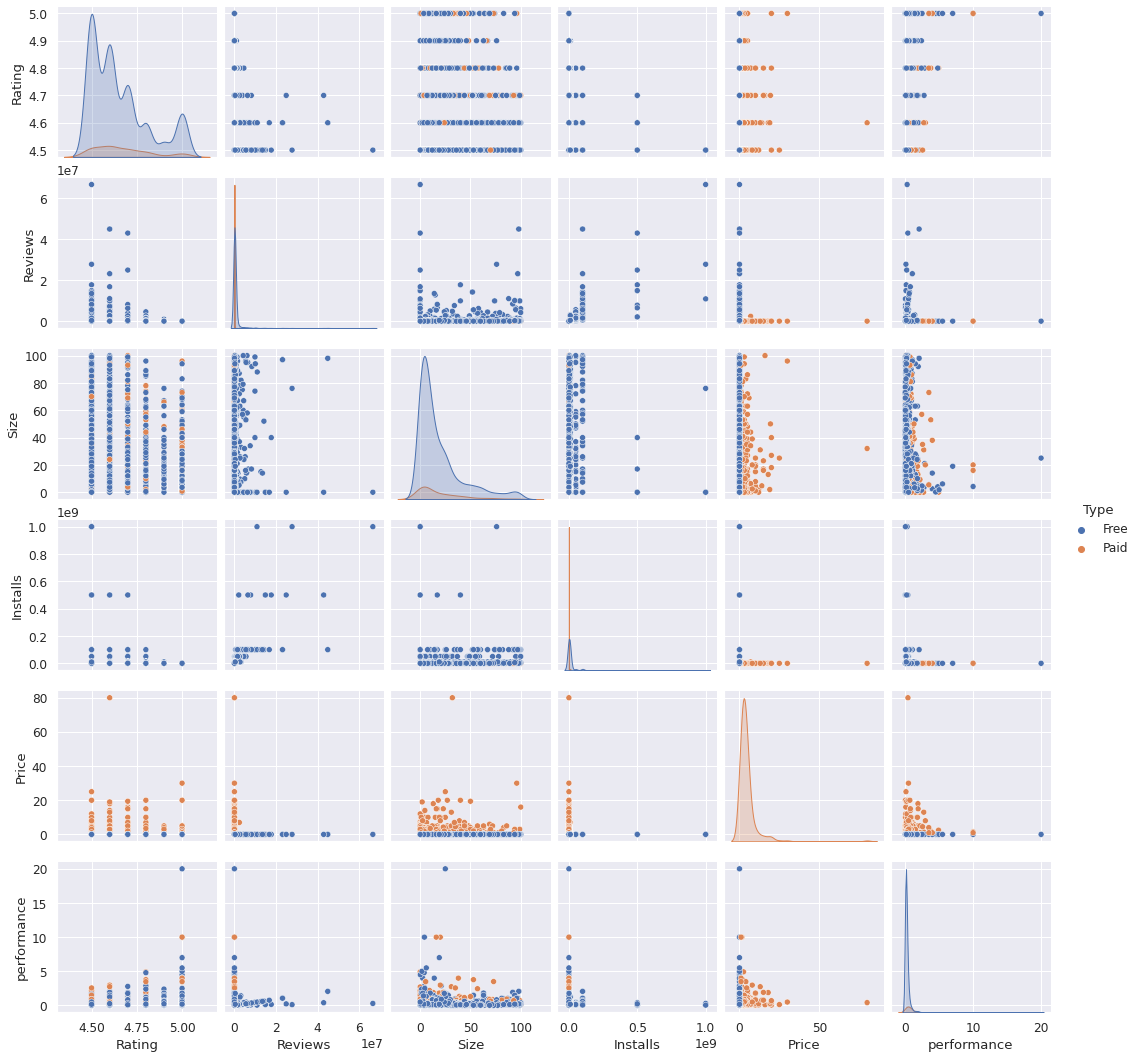

In [472]:
# Pair Plot highly rated apps
# Chart: Pair Plots
sns.pairplot(app_data.query('Rating >= 4.5'), hue='Type')
plt.show()

##### 1. Why did you pick the specific chart?

We are interested in finding common things in apps that are highly rated. So, we are limiting the input dataset that we pass to the pair plot.

##### 2. What is/are the insight(s) found from the chart?

From this pair plot we are able to observe:
- The apps with most number of reviews are free apps. In fact, paid apps recieved very little number of reviews.
- The apps that are free have comparatively more number of installs than the paid apps.
- There is no clear relation between variables of apps that are rated more than 4.5 

#### Chart - 16 - Pair Plot 

In [473]:
app_data.Installs.sort_values(ascending=False).unique()

array([1000000000,  500000000,  100000000,   50000000,   10000000,
          5000000,    1000000,     500000,     100000,      50000,
            10000,       5000,       1000,        500,        100,
               50,         10,          5,          1,          0])

In [474]:
# Number of apps that are have more than the specified number of installs
unique_number_of_installs = app_data.Installs.sort_values(ascending=False).unique()
print(f"Count of apps with installs greater than or equal to:")
for number in unique_number_of_installs:
    print(f"{number}: {app_data.query('Installs >= @number').App.count()}")

# app_data.query('Installs >= 1000000').App.count()

Count of apps with installs greater than or equal to:
1000000000: 21
500000000: 48
100000000: 252
50000000: 463
10000000: 1422
5000000: 2042
1000000: 3472
500000: 3982
100000: 5096
50000: 5565
10000: 6596
5000: 7064
1000: 7954
500: 8282
100: 8992
50: 9196
10: 9581
5: 9663
1: 9730
0: 9745


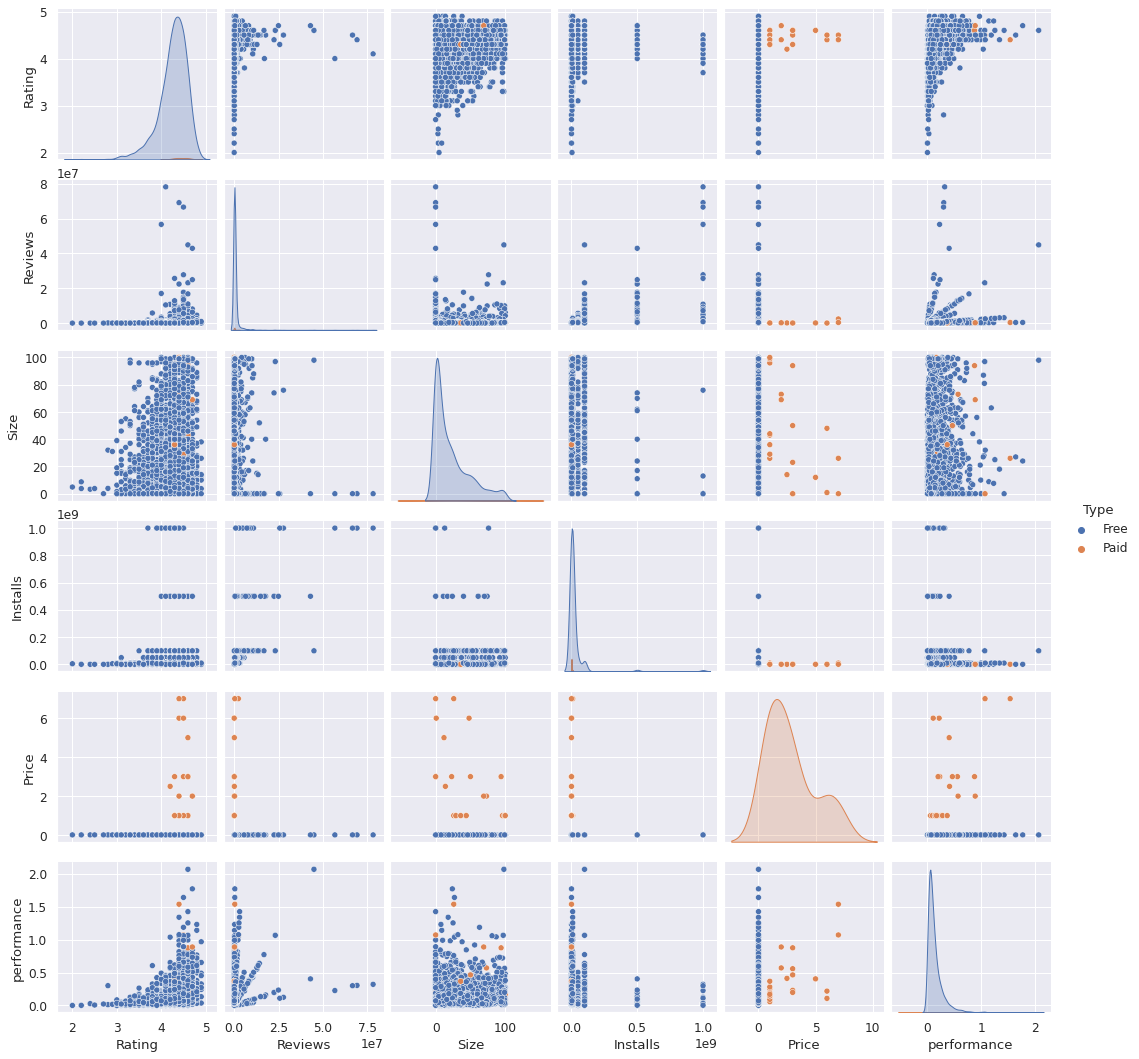

In [475]:
# We will inspect apps with more than 1 million installs
# Chart: Pair Plots
sns.pairplot(app_data.query('Installs >= 1000000'), hue='Type')
plt.show()

##### 1. Why did you pick the specific chart?

We are interested in finding common things in apps that are installed more.

##### 2. What is/are the insight(s) found from the chart?

From this pair plot we are able to observe:
- From install vs reviews we can see that apps with highest number of installs are those with highest number of reviews.
- Apps with highest number of installs are typically rated from 3.5 to around 5.
- Paid apps are not installed as much as free apps.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?

The business objective is to find top categories for developing new apps and find common attributes between most installed apps, and those between top rated apps. We have found that top performing categories for most installs, reviews and ratings are: Game, Communication, Tools, Social, Family and Productivity. The price point should not be too high as most apps are free, and most paid apps cost under $10.

# **Conclusion**

The EDA performed above reveals top categories by various metrics among which the top categories by our custom performance metric are:
1. Game
2. Social
3. Medical
4. Weather
5. Family

The focus should be on developing apps in these top categories for maximum reach and number of installs. Also, in order to get high number of installs, developers should focus on getting more number of positive reviews with positive rating. The price of the app should be kept as low as possible, and preferrably the app should be free.